In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

/Users/Jing/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
learning_rate = 0.01
training_epochs = 500

In [3]:
#Define the sigmoid function:
def sigmoid(x):
    return 1. / (1.+np.exp(-x))

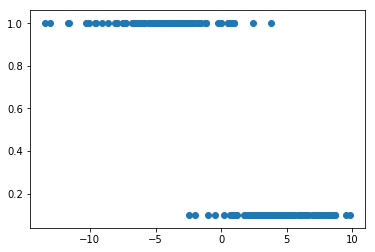

In [4]:
#Create our data points on the x and y-axis:
x1 = np.random.normal(5,3,100)
x2 = np.random.normal(-5,3,100)
xs = np.append(x1, x2)
ys = np.asarray([0.1] * len(x1) + [1.]*len(x2))
plt.scatter(xs, ys)

In [5]:
# Create our parameters and placeholders for X and Y to feed them with the
# data above:
X = tf.placeholder(tf.float32, shape=(None,), name="x")
Y = tf.placeholder(tf.float32, shape=(None,), name="y")
w = tf.Variable([0.,0,], name="parameter", trainable=True)
y_model = tf.sigmoid(-w[1]*X +w[0])

In [6]:
# Calculate the cost and adaption (learning):
cost = tf.reduce_mean(-tf.log(y_model * Y + (1-y_model) * (1-Y)))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
# Run the model:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_err = 0
    for epoch in range(training_epochs):
        err, _ = sess.run([cost, train_op], {X: xs, Y: ys}) 
        print(epoch, err)
        if abs(prev_err - err) <0.0001: # adjust to see curve chage with epochs
            break  #check whrn the error is small enough to quit
        prev_err = err
    w_val = sess.run(w, {X: xs, Y:ys}) 

0 0.6931474
1 0.6500484
2 0.6122459
3 0.579097
4 0.54998374
5 0.524343
6 0.50167865
7 0.48156264
8 0.46363094
9 0.44757596
10 0.43313873
11 0.42010158
12 0.40828088
13 0.39752185
14 0.38769343
15 0.37868404
16 0.37039855
17 0.36275554
18 0.35568482
19 0.34912586
20 0.34302616
21 0.3373398
22 0.3320269
23 0.3270523
24 0.3223852
25 0.31799802
26 0.3138668
27 0.3099699
28 0.30628812
29 0.30280423
30 0.29950276
31 0.2963699
32 0.2933932
33 0.29056126
34 0.28786382
35 0.28529158
36 0.28283608
37 0.28048962
38 0.27824506
39 0.2760959
40 0.27403635
41 0.27206078
42 0.27016437
43 0.26834226
44 0.26659036
45 0.26490462
46 0.26328143
47 0.26171735
48 0.26020917
49 0.25875404
50 0.25734925
51 0.2559922
52 0.2546805
53 0.25341192
54 0.25218442
55 0.250996
56 0.2498449
57 0.24872932
58 0.2476477
59 0.24659854
60 0.24558038
61 0.2445919
62 0.24363178
63 0.2426989
64 0.24179205
65 0.24091019
66 0.24005234
67 0.23921753
68 0.23840488
69 0.23761345
70 0.2368425
71 0.2360912
72 0.23535883
73 0.23464474


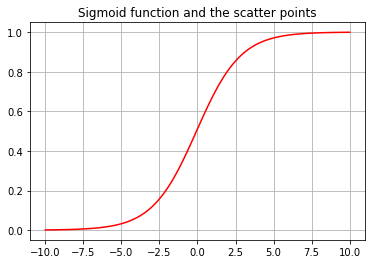

202 0.20013532


In [8]:
# Plot the resulting sigmoid:
all_xs = np.linspace(-10, 10, 100)
plt.plot(all_xs, sigmoid(all_xs * w_val[1] + w_val[0]), 'r') # calculate the signmoid
plt.grid(), plt.title("Sigmoid function and the scatter points")
plt.pause(1)
print(epoch, err)